<a href="https://colab.research.google.com/github/dhivyasreedhar/Music-Instrument-Recognition/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from skimage.color import rgb2grey
from matplotlib.image import imread
#!pip install -q keras
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, ReLU, Dropout
from tensorflow.keras.utils import to_categorical

class_names = ['flute', 'viola', 'cello', 'oboe', 'trumpet', 'saxophone']
number_of_classes = len(class_names)

instruments = {'flute':1, 'viola':2, 'cello':3, 'oboe':4, 'trumpet':5, 'saxophone':6}

files = glob.glob('/content/drive/MyDrive/london_phill_dataset_multi/spectrograms/*.png')
np.random.shuffle(files)

data, labels = [], []

loaded = 0

print('Number of samples {0}'.format(len(files)))

for file in files:
  img, name = imread(file), file.split('/')[-1].split('_')[0]
  data.append(rgb2grey(img))
  labels.append(instruments[name] - 1)

  loaded += 1
  if loaded % 200 == 0:
    print(loaded)

  if loaded == 5000:
    break

data, labels = np.array(data), np.array(labels)

s_60p, s_20p = int(len(data) * 0.6), int(len(data) * 0.2)

X_train, y_train = data[:s_60p], labels[:s_60p] #60%
X_validation, y_validation = data[s_60p: s_60p + s_20p], labels[s_60p: s_60p + s_20p]  #20%
X_test, y_test = data[s_60p + s_20p:], labels[s_60p + s_20p:] #20%

print(X_train.shape, X_test.shape)


Number of samples 600
200
400
600
(360, 540, 1080) (120, 540, 1080)


In [4]:
print(X_validation.shape, y_validation.shape)

(120, 540, 1080) (120,)


In [5]:
X_train = X_train.reshape(X_train.shape[0], 540, 1080,1)
X_test = X_test.reshape(X_test.shape[0], 540, 1080, 1)
X_validation = X_validation.reshape(X_validation.shape[0], 540, 1080, 1)

print('Dataset has been loaded succesfully.')
print(X_train.shape, y_train.shape)
print(X_validation.shape, y_validation.shape)

print(to_categorical(y_train).shape)
print(to_categorical(y_validation).shape)
print(X_train.shape[1:])

epochs = 30

model = Sequential([
        Conv2D(32, (3, 3), input_shape=(540, 1080, 1)),
        Activation('relu'),
        Conv2D(32, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(3, 3)),
        Dropout(0.25),

        Conv2D(64, (3,3), padding='same'),
        Activation('relu'),
        Conv2D(64, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(3, 3)),
        Dropout(0.25),

        Conv2D(128, (3, 3), padding='same'),
        Activation('relu'),
        Conv2D(128, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(3, 3)),
        Dropout(0.25),

        Flatten(),
        Dense(128),
        Activation('relu'),
        Dropout(0.5),
        Dense(number_of_classes),
        Activation('softmax')
    ])

model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

print('Fitting started...')
history = model.fit(X_train, to_categorical(y_train), epochs=epochs, validation_data=(X_validation, to_categorical(y_validation)))



Dataset has been loaded succesfully.
(360, 540, 1080, 1) (360,)
(120, 540, 1080, 1) (120,)
(360, 6)
(120, 6)
(540, 1080, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 538, 1078, 32)     320       
_________________________________________________________________
activation (Activation)      (None, 538, 1078, 32)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 536, 1076, 32)     9248      
_________________________________________________________________
activation_1 (Activation)    (None, 536, 1076, 32)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 178, 358, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 178, 358, 32)      0        

{'loss': [2.055436611175537, 1.7896636724472046, 1.765073299407959, 1.711614966392517, 1.5625436305999756, 1.302616000175476, 1.2454659938812256, 1.0167279243469238, 0.7772990465164185, 0.5574911832809448, 0.4082548916339874, 0.3696330487728119, 0.3548458218574524, 0.2966839671134949, 0.21690914034843445, 0.1860852837562561, 0.23616263270378113, 0.21022464334964752, 0.15076428651809692, 0.16679292917251587, 0.2111634612083435, 0.19883087277412415, 0.11561667919158936, 0.1742481142282486, 0.17005528509616852, 0.0804564505815506, 0.11167585849761963, 0.1033235639333725, 0.06578836590051651, 0.047787804156541824], 'accuracy': [0.18611110746860504, 0.20277777314186096, 0.2222222238779068, 0.28611111640930176, 0.3777777850627899, 0.4833333194255829, 0.5, 0.6222222447395325, 0.7138888835906982, 0.8055555820465088, 0.8416666388511658, 0.875, 0.8694444298744202, 0.8888888955116272, 0.9361110925674438, 0.9361110925674438, 0.9166666865348816, 0.9166666865348816, 0.9388889074325562, 0.93888890743

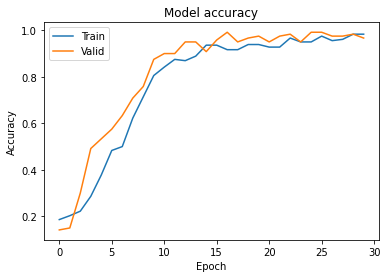

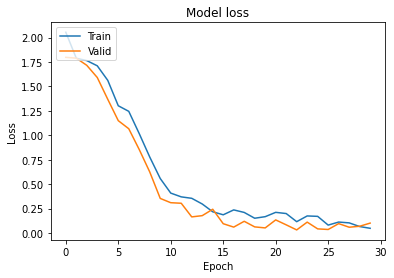

In [8]:
#model accuracy
print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

#model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [21]:
scores = model.evaluate(X_test, to_categorical(y_test), verbose=1)
print(scores)

4/4 [==============================] - 57s 14s/step - loss: 0.0242 - accuracy: 0.9917
[0.024248041212558746, 0.9916666746139526]
